## Import lib

In [29]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
from feature import *

### Load image file

In [35]:
image_path = "D:\\Hoc\\Mutimedia_database_system\\System\\Multimedia-Database-System\\kmeans1\\10\\Kiwi (03).jpg"
image = cv.imread(image_path)

### Create and distance center distance

In [31]:
def Centers(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        centers = []
        for line in lines:
            center = [float(x) for x in line.strip().split()]
            centers.append(center)
        return centers

def euclidean_distance(vector1, vector2):
    # Tính khoảng cách Euclidean giữa hai vector
    return np.linalg.norm(vector1 - vector2)

def find_Center(point, centers):
    point = np.array(point)
    min_distance = float('inf')
    closest_center = None
    closest_index = -1
    
    for i,center in enumerate(centers):
        
        distance = euclidean_distance(point, center)
        
        if distance < min_distance:
            min_distance = distance
            closest_center = center
            closest_index = i
    
    return closest_center, closest_index

### find cluster function

In [32]:
def find_cluster(point):
    folder_path = "D:\\Hoc\\Mutimedia_database_system\\System\\Multimedia-Database-System\\kmeans1"
    filename ="cluster_center.txt"
    file_path = os.path.join(folder_path, filename)

    while os.path.exists(file_path):
        centers = Centers(file_path)
        center, index = find_Center(point, centers)
        folder_path = os.path.join(folder_path, str(index))
        file_path = os.path.join(folder_path, filename)
    
    return folder_path 

### Cosine distance

In [33]:
def cosin_distance(vector1, vector2):
    # Tính khoảng cách cosin giữa hai vector
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

### MAIN

D:\Hoc\Mutimedia_database_system\System\Multimedia-Database-System\kmeans1\10
{'kmeans1\\10\\Kiwi (02).jpg': {'Bow': [1, 7, 1, 0, 1, 0, 0, 4, 2, 0, 4, 1, 7, 0, 5, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2], 'avg_Hue': 20.7703, 'avg_Saturation': 101.897, 'avg_Value': 170.7056}, 'kmeans1\\10\\Kiwi (03).jpg': {'Bow': [3, 10, 1, 0, 2, 0, 0, 9, 2, 2, 3, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 3, 1, 0, 0, 2, 0, 0, 1], 'avg_Hue': 20.4872, 'avg_Saturation': 107.41, 'avg_Value': 163.833}, 'kmeans1\\10\\Kiwi (04).jpg': {'Bow': [0, 14, 1, 1, 1, 1, 2, 8, 0, 2, 1, 1, 4, 0, 7, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2], 'avg_Hue': 19.1482, 'avg_Saturation': 107.6279, 'avg_Value': 157.678}, 'kmeans1\\10\\Kiwi (06).jpg': {'Bow': [0, 5, 0, 2, 2, 2, 1, 7, 0, 2, 1, 0, 6, 0, 3, 0, 2, 3, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 3], 'avg_Hue': 22.5842, 'avg_Saturation': 89.5939, 'avg_Value': 171.8055}, 'kmeans1\\10\\Kiwi (07).jpg': {'Bow': [0, 8, 0, 4, 4, 1, 0, 8, 0, 3, 0, 0, 4, 2, 1, 2, 2, 0, 1, 1, 2, 3, 0, 1, 2, 2, 

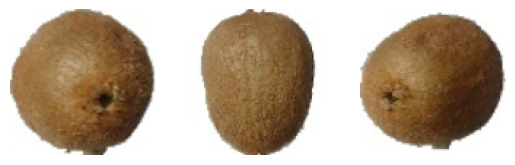

In [36]:
image_HSV = average_HSV(image)

cluster_path = find_cluster(image_HSV)
print(cluster_path)
image_feature = get_image_feature(image,cluster_path)

metadata_path = os.path.join(cluster_path, "metadata.txt")

metadata = {}

with open(metadata_path,"r") as file:
    for line in file:
        key, value = line.strip().split(": ",1)
        key = key.strip()
        value = value.strip()
        
        dict_value = eval(value)
        
        for key1,value1 in dict_value.items():
            if isinstance(value1, list):
                pass
            else:
                try:
                    dict_value[key1] = float(value1)
                except ValueError:
                    pass
                
        metadata[key] = dict_value

print(metadata)
for key in metadata:
    dict_tmp = metadata[key]
    feature = dict_tmp['Bow']
    distance = cosin_distance(image_feature, feature)
    metadata[key]=distance

sorted_metadata = sorted(metadata.items(), key=lambda x: x[1],reverse=True)[:3]

fig, axes = plt.subplots(1, 3)

for i,(path,_) in enumerate(sorted_metadata):
    image = cv.imread(path)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    axes[i].imshow(image_rgb)
    axes[i].axis('off')
    
plt.show()
